In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image
import ipywidgets as widgets
from IPython.display import display, clear_output

## 🤖 Introducción al Clustering (Agrupamiento)

### ¿Qué es el clustering?

**Clustering** es una técnica de *aprendizaje no supervisado* que nos ayuda a **agrupar datos similares entre sí**, sin necesidad de saber de antemano a qué grupo pertenecen. Es como cuando ordenas ropa: camisas con camisas, pantalones con pantalones, etc., pero sin etiquetas previas. Tú decides cómo agruparlas según su color, tamaño o tipo.

---

### 🎯 ¿Para qué sirve en la vida real?

- **Agrupar clientes** según sus hábitos de compra.
- **Organizar documentos** o correos similares.
- **Segmentar imágenes** según colores o formas.
- **Detectar comportamientos anómalos** (por ejemplo, posibles fraudes).

---

### 📦 Ejemplo sencillo:

Imagina que tienes los datos de altura y peso de muchas personas. El clustering puede ayudarte a detectar **grupos naturales**, como:
- Personas más bajitas y livianas.
- Personas medianas.
- Personas más altas y pesadas.

Sin que nadie te diga cuántos grupos hay o quién pertenece a cuál. ¡El algoritmo lo descubre solo!

---

### 🧠 Clave: no hay etiquetas

A diferencia de otros modelos que aprenden a partir de respuestas conocidas (por ejemplo, "esta imagen es un gato"), el clustering **no tiene etiquetas previas**. Solo tiene los datos y busca patrones de similitud.

---

### 📊 Algoritmo más común: K-Means

Uno de los métodos más usados para clustering es **K-Means**, que divide los datos en **K grupos** distintos basados en su similitud. Nosotros elegimos cuántos grupos queremos (el número K), y el algoritmo trata de formar esos grupos de la mejor manera posible.

---


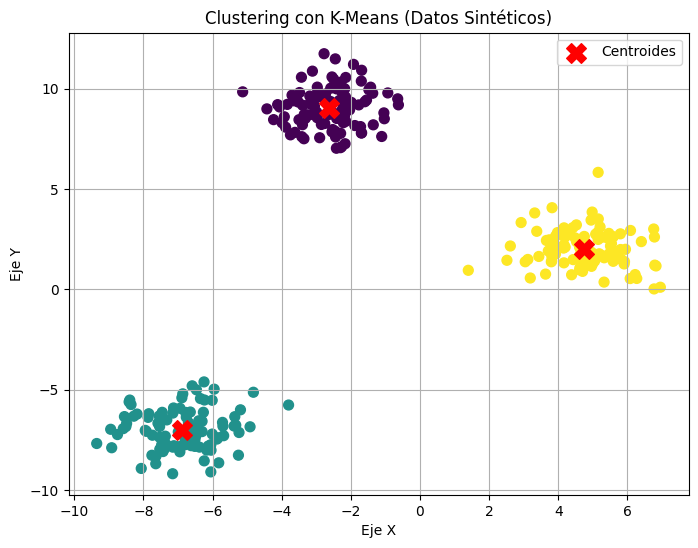

In [ ]:
# 🔹 Generamos datos sintéticos con 3 centros (clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# 🔹 Aplicamos KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# 🔹 Convertimos los datos en DataFrame para facilidad
df = pd.DataFrame(X, columns=['x', 'y'])
df['cluster'] = clusters

# 🔹 Visualizamos los puntos coloreados por grupo
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroides')
plt.title('Clustering con K-Means (Datos Sintéticos)')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

## 🧩 Conceptos Claves de Clustering

### 🔸 1. Centroides

Un **centroide** es el punto que representa el "centro" de un grupo (o cluster). No necesariamente es un dato real del conjunto, sino un punto promedio calculado a partir de todos los puntos que pertenecen a ese grupo.

📌 En el algoritmo K-Means, los centroides se actualizan constantemente hasta que se estabilizan (es decir, ya no cambian de posición).

---

### 🔸 2. Distancias: cómo medimos la similitud

Para saber a qué cluster pertenece un punto, usamos **métricas de distancia**. Estas indican qué tan cerca o lejos están dos puntos.

#### 📏 a. Distancia Euclidiana (la más común)

Es la distancia "en línea recta" entre dos puntos. Como cuando trazas una cuerda entre dos lugares en un mapa.

**Fórmula:**

$$
\text{distancia} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

#### 📏 b. Distancia Manhattan

Es la distancia que recorrerías caminando en una cuadrícula (como las calles de una ciudad).

**Fórmula:**

$$
\text{distancia} = |x_2 - x_1| + |y_2 - y_1|
$$

#### 📏 c. Distancia Chebyshev

Solo importa el **mayor desplazamiento** entre ejes. Imagina que te puedes mover en cualquier dirección, pero solo cuenta el paso más largo.

**Fórmula:**

$$
\text{distancia} = \max(|x_2 - x_1|, |y_2 - y_1|)
$$

---

### 🔄 3. Reasignación y Actualización

El algoritmo de clustering (por ejemplo, K-Means) funciona de forma iterativa:

1. **Asignar:** Cada punto se asigna al cluster con el centroide más cercano (según la distancia elegida).
2. **Actualizar:** Se recalculan los centroides con base en los puntos asignados a cada grupo.
3. Se repite el proceso hasta que los centroides no cambien mucho.

---

### 💡 Intuición Final

Clustering es como organizar objetos por parecido. Las **distancias** nos ayudan a saber qué tan parecido es un punto a un grupo. Los **centroides** resumen ese grupo. Y el algoritmo se ajusta una y otra vez para mejorar esas agrupaciones.


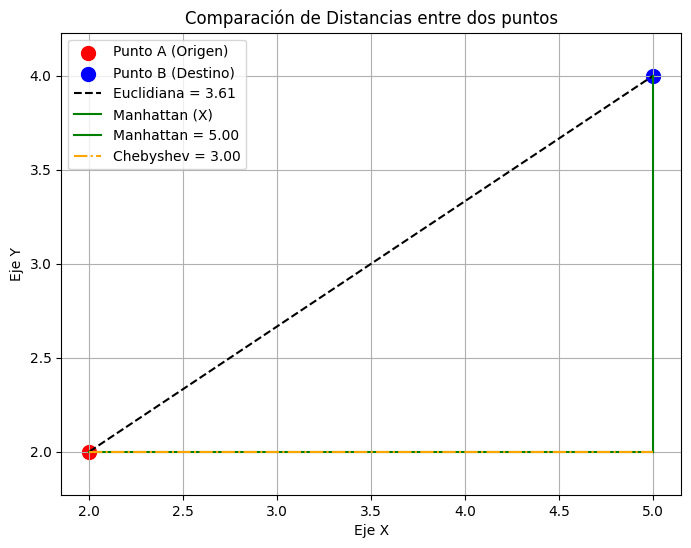

In [ ]:
# Punto de origen (puede ser un centroide)
origen = np.array([2, 2])

# Punto de destino
destino = np.array([5, 4])

# Calcular las distancias
def euclidiana(a, b):
    return np.sqrt(np.sum((a - b)**2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

def chebyshev(a, b):
    return np.max(np.abs(a - b))

dist_euclid = euclidiana(origen, destino)
dist_manhattan = manhattan(origen, destino)
dist_chebyshev = chebyshev(origen, destino)

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Puntos
plt.scatter(*origen, color='red', s=100, label='Punto A (Origen)')
plt.scatter(*destino, color='blue', s=100, label='Punto B (Destino)')

# Distancia Euclidiana (línea recta)
plt.plot([origen[0], destino[0]], [origen[1], destino[1]], 'k--', label=f'Euclidiana = {dist_euclid:.2f}')

# Distancia Manhattan (camino en escalera: eje X luego eje Y)
plt.plot([origen[0], destino[0]], [origen[1], origen[1]], 'g-', label='Manhattan (X)')
plt.plot([destino[0], destino[0]], [origen[1], destino[1]], 'g-', label=f'Manhattan = {dist_manhattan:.2f}')

# Distancia Chebyshev (línea en diagonal o en L que representa el mayor cambio)
cheb_x = destino[0] if abs(destino[0] - origen[0]) >= abs(destino[1] - origen[1]) else origen[0]
cheb_y = destino[1] if abs(destino[1] - origen[1]) >= abs(destino[0] - origen[0]) else origen[1]
plt.plot([origen[0], cheb_x], [origen[1], cheb_y], 'orange', linestyle='-.', label=f'Chebyshev = {dist_chebyshev:.2f}')

# Estética
plt.title('Comparación de Distancias entre dos puntos')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()


## 🧠 Principales Algoritmos de Clustering y Cuándo Usarlos

En ciencia de datos, existen varios algoritmos para agrupar datos según sus similitudes. Cada uno tiene fortalezas distintas y **es más útil en ciertos contextos**. Aquí te mostramos los más comunes y **cuándo deberías usarlos**.

---

### 🔹 1. K-Means

**¿Cómo funciona?** Agrupa los puntos alrededor de "centroides" (puntos promedio). Tú decides cuántos grupos quieres (K).

**¿Cuándo usarlo?**
- Cuando tus datos son numéricos.
- Si los grupos están bien separados y tienen forma circular.
- Cuando necesitas algo rápido y sencillo.

🧾 **Ejemplo real:** agrupar clientes según edad e ingresos.

---

### 🔹 2. DBSCAN (Density-Based Spatial Clustering)

**¿Cómo funciona?** Encuentra grupos de puntos que están densamente conectados y deja por fuera los que están aislados (ruido o anomalías).

**¿Cuándo usarlo?**
- Si tus datos tienen formas raras (no redondas).
- Si hay ruido o valores atípicos.
- Si no sabes cuántos grupos hay.

🧾 **Ejemplo real:** detectar fraudes o zonas geográficas con actividad inusual.

---

### 🔹 3. Clustering Jerárquico (Agglomerative)

**¿Cómo funciona?** Comienza agrupando los puntos más cercanos y construye una estructura tipo árbol (dendrograma).

**¿Cuándo usarlo?**
- Si te interesa entender la relación entre grupos.
- Si no sabes cuántos grupos hay y quieres explorarlo visualmente.

🧾 **Ejemplo real:** clasificar especies o agrupar productos similares.

---

### 🔹 4. Mean Shift

**¿Cómo funciona?** Se mueve hacia las zonas donde hay mayor concentración de puntos, sin que tengas que definir cuántos grupos hay.

**¿Cuándo usarlo?**
- Cuando tus datos tienen "picos" o zonas densas.
- Si no sabes cuántos clusters hay.

🧾 **Ejemplo real:** detectar zonas con más tráfico o concentración de personas.

---

### 🔹 5. Spectral Clustering

**¿Cómo funciona?** Usa matemáticas de redes y grafos para detectar grupos que están más conectados entre sí.

**¿Cuándo usarlo?**
- Si los grupos tienen formas complejas o no se separan bien con K-Means.
- Si los datos vienen de redes o relaciones.

🧾 **Ejemplo real:** detectar comunidades en redes sociales o agrupar imágenes por características.

---

### 🧭 ¿Cuál usar?

| Situación | Algoritmo recomendado |
|----------|-----------------------|
| Grupos bien separados | K-Means |
| Grupos con formas raras o con ruido | DBSCAN |
| No sabes cuántos grupos hay | Clustering Jerárquico o Mean Shift |
| Datos con relaciones o estructuras complejas | Spectral Clustering |



![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

## 🎯 ¿Cómo funciona el algoritmo K-Means?

**K-Means** es uno de los algoritmos de clustering más conocidos y usados. Su objetivo es **dividir los datos en grupos (clusters) que tengan puntos similares entre sí**, según su distancia a un punto central llamado **centroide**.

---

### 🔄 ¿Cómo funciona paso a paso?

Imagina que tienes varios puntos en un plano (como coordenadas X, Y) y quieres agruparlos en K grupos:

1. **Escoge K (el número de grupos)** que deseas crear.
2. **Inicializa aleatoriamente K centroides** (los puntos centrales de cada grupo).
3. **Asigna cada punto al centroide más cercano**, formando grupos.
4. **Actualiza los centroides**, calculando el promedio de los puntos de cada grupo.
5. **Repite** los pasos 3 y 4 hasta que los centroides ya no cambien mucho (convergencia).

---

### 🧠 Intuición sencilla

Es como si lanzaras K imanes sobre los datos, y cada punto "se pega" al imán más cercano. Luego mueves los imanes al centro de los puntos que atrajeron, y repites esto hasta que todos se estabilizan.

---

### ⚙️ Hiperparámetros clave

Al entrenar un modelo con K-Means, hay **3 parámetros importantes** que puedes ajustar:

| Hiperparámetro | ¿Qué hace? | Consecuencia |
|----------------|------------|--------------|
| `n_clusters`   | Número de grupos (K) a crear | Elegir mal este número puede generar agrupaciones forzadas o insuficientes. |
| `init`         | Cómo se eligen los centroides iniciales (`"random"` o `"k-means++"`) | `"k-means++"` es preferido porque reduce el riesgo de malas agrupaciones iniciales. |
| `max_iter`     | Número máximo de iteraciones para ajustar los centroides | Evita ciclos infinitos si el algoritmo no converge. Valor común: 300 |

---

### 📝 Consideraciones

- Elegir el valor correcto de **K** es muy importante. Más adelante veremos técnicas como el **método del codo** para ayudarte a decidir.
- K-Means **no funciona bien** si los clusters tienen formas no circulares, densidades distintas o hay muchos outliers.


/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


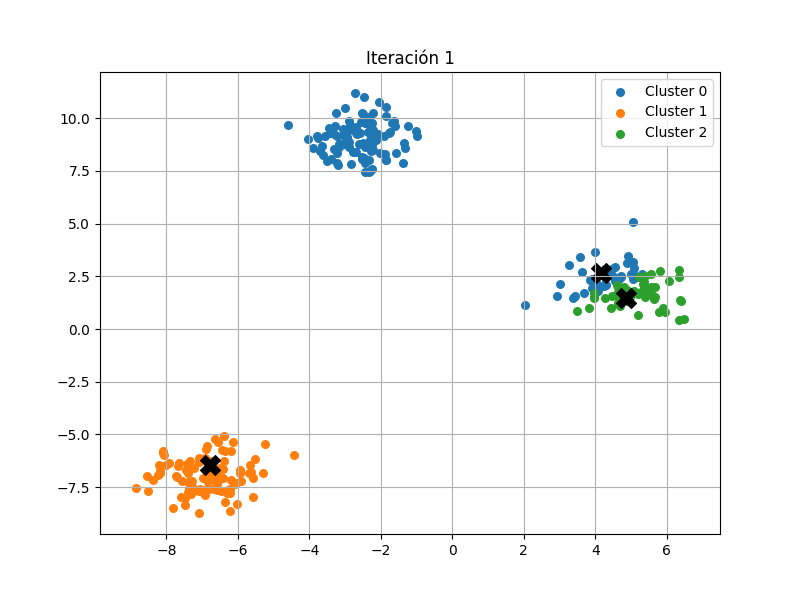

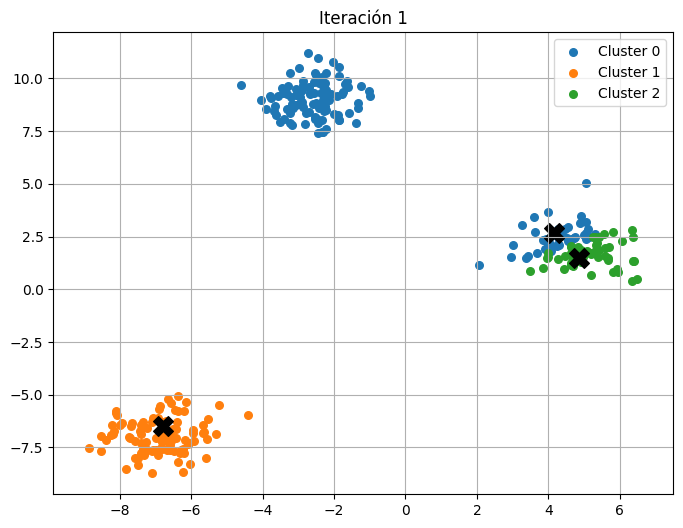

In [ ]:
# 1. Generar datos
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# 2. Inicializar centroides
k = 3
max_iter = 10
np.random.seed(42)
indices_iniciales = np.random.choice(len(X), k, replace=False)
centroides = X[indices_iniciales]
historial_centroides = [centroides.copy()]
asignaciones = []

# 3. Simular K-Means manualmente
for _ in range(max_iter):
    # Asignación
    distancias = np.linalg.norm(X[:, np.newaxis] - centroides, axis=2)
    grupos = np.argmin(distancias, axis=1)
    asignaciones.append(grupos.copy())

    # Actualización
    nuevos_centroides = np.array([X[grupos == j].mean(axis=0) for j in range(k)])
    historial_centroides.append(nuevos_centroides)

    if np.allclose(centroides, nuevos_centroides):
        break
    centroides = nuevos_centroides

# 4. Crear animación
fig, ax = plt.subplots(figsize=(8, 6))

def actualizar(frame):
    ax.clear()
    grupos = asignaciones[frame]
    centroides = historial_centroides[frame]

    for i in range(k):
        puntos = X[grupos == i]
        ax.scatter(puntos[:, 0], puntos[:, 1], s=30, label=f'Cluster {i}')
        ax.scatter(centroides[i, 0], centroides[i, 1], c='black', s=200, marker='X')

    ax.set_title(f"Iteración {frame + 1}")
    ax.set_xlim(X[:,0].min() - 1, X[:,0].max() + 1)
    ax.set_ylim(X[:,1].min() - 1, X[:,1].max() + 1)
    ax.legend()
    ax.grid(True)

anim = FuncAnimation(fig, actualizar, frames=len(asignaciones), interval=1000)

# 5. Guardar como GIF y mostrar
gif_path = "/content/kmeans_animacion.gif"
anim.save(gif_path, writer=PillowWriter(fps=1))

# 6. Mostrar en notebook
Image(filename=gif_path)


## ❓ ¿Cómo elegir el número óptimo de clusters (K) en K-Means?

El algoritmo K-Means necesita que le digamos **cuántos grupos (K)** debe formar. Pero… ¿cómo saber cuántos son los adecuados?

Hay varias estrategias, pero la más común es el:

---

### 📉 Método del Codo (Elbow Method)

Este método busca el punto donde **agregar más clusters ya no mejora mucho la agrupación**.

### 🔍 ¿Cómo funciona?

1. Ejecutamos K-Means con diferentes valores de K (por ejemplo de 1 a 10).
2. Calculamos una métrica llamada **inercia** (o suma de errores al cuadrado).
   - Esta métrica nos dice **qué tan lejos están los puntos de su centroide**.
3. Hacemos un gráfico de K vs Inercia.
4. Buscamos el punto donde la inercia **deja de disminuir bruscamente**: ese es el “codo” y suele ser un buen valor para K.

---

### 💡 Intuición

Es como cuando doblas el brazo: el **codo** es donde se nota el cambio más fuerte en la dirección de la curva.

---

### 📌 Otros métodos más avanzados (opcional):

- **Silhouette Score**: mide qué tan bien separado está un grupo de los otros.
- **Gap Statistic**: compara los grupos contra agrupaciones generadas aleatoriamente.
- **Visualización 2D/3D**: a veces puedes ver visualmente cuántos grupos hay.

---


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


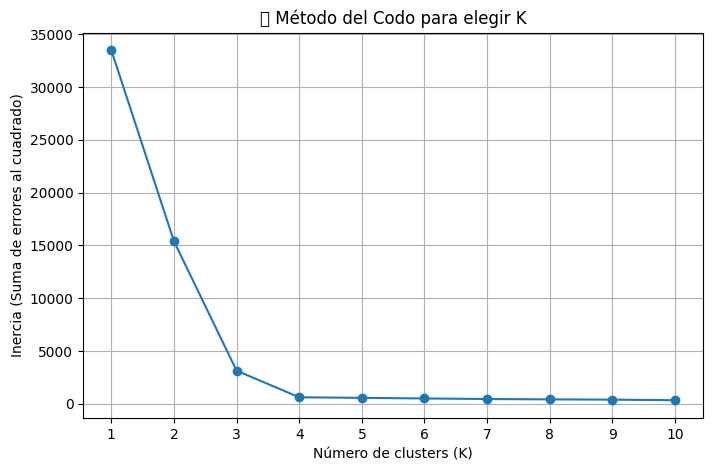

In [ ]:
# Generar datos sintéticos
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

# Evaluar diferentes valores de K
inertias = []
K_range = range(1, 11)

for k in K_range:
    modelo = KMeans(n_clusters=k, init='k-means++', random_state=42)
    modelo.fit(X)
    inertias.append(modelo.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo para elegir K")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia (Suma de errores al cuadrado)")
plt.grid(True)
plt.xticks(K_range)
plt.show()


## 🧪 Silhouette Score: Otra forma de elegir el mejor número de clusters (K)

Además del método del codo, existe una métrica más **objetiva y matemática** llamada **Silhouette Score**, que te ayuda a evaluar **qué tan bien formados están los grupos**.

---

### 🔍 ¿Cómo funciona?

El **Silhouette Score** mide para cada punto:

1. Qué tan cerca está de los puntos de **su mismo grupo** (cohesión).
2. Qué tan lejos está de los puntos del **grupo más cercano** (separación).

$$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$$

- `a` = distancia promedio a puntos del **mismo grupo**
- `b` = distancia promedio al **grupo más cercano distinto**

El resultado va de **-1 a 1**:

| Valor | Interpretación |
|-------|----------------|
| Cerca de 1 | Bien agrupado y bien separado |
| Cerca de 0 | En el borde entre dos grupos |
| Menor a 0 | Mal asignado |

---

### ✅ ¿Cuándo usarlo?

- Cuando no estás seguro del número de clusters.
- Cuando quieres **medir qué tan buena es la separación** entre grupos.


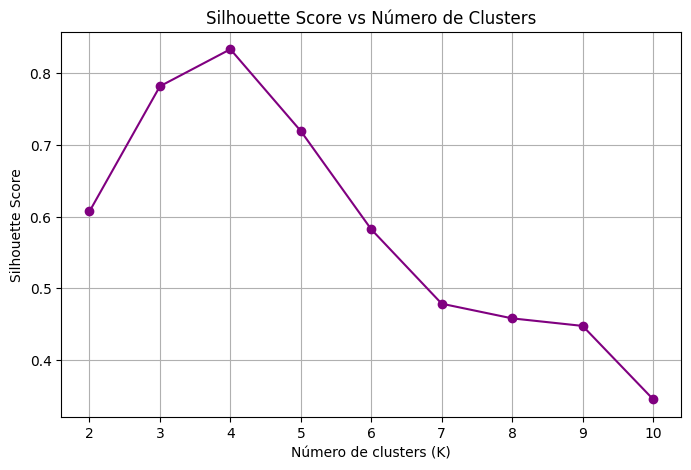

In [ ]:
# Datos sintéticos
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

# Evaluar Silhouette para varios valores de K
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    modelo = KMeans(n_clusters=k, random_state=42)
    etiquetas = modelo.fit_predict(X)
    score = silhouette_score(X, etiquetas)
    silhouette_scores.append(score)

# Graficar resultados
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', color='purple')
plt.title("Silhouette Score vs Número de Clusters")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(K_range)
plt.show()


## 🌌 ¿Qué es DBSCAN y cómo funciona paso a paso?

**DBSCAN** significa _Density-Based Spatial Clustering of Applications with Noise_.

Es un algoritmo que **detecta grupos de puntos basándose en densidad** y **no requiere que le digas cuántos grupos hay**. También es capaz de detectar automáticamente los **outliers** o puntos que no pertenecen a ningún grupo.

---

### 🔄 ¿Cómo funciona DBSCAN? Paso a paso

DBSCAN usa dos parámetros clave:

- `eps`: el **radio de vecindad**, o qué tan cerca deben estar los puntos para ser considerados "vecinos".
- `min_samples`: el **número mínimo de vecinos** que un punto necesita para considerarse parte de un grupo denso (un “punto núcleo”).

---

### 🧠 Intuición paso a paso:

1. **Toma un punto aleatorio** que aún no ha sido asignado.
2. Cuenta cuántos puntos están **dentro de un radio `eps`** desde él.
3. Según esa cantidad:
   - Si hay **≥ `min_samples`**, el punto es un **núcleo** y comienza un nuevo cluster.
   - Si hay menos, el punto se marca como **ruido** (por ahora).
4. Si se formó un cluster:
   - Busca todos los vecinos de ese núcleo.
   - Si alguno de esos vecinos también es núcleo, **expande el cluster** con sus vecinos.
   - Continúa expandiendo mientras encuentres nuevos núcleos conectados.
5. Repite desde el paso 1 con otro punto no visitado.
6. Al final, los puntos que no quedaron asignados a ningún grupo se marcan como **outliers**.

---

### 🔎 Tipos de puntos que identifica:

| Tipo         | ¿Cómo se define? |
|--------------|------------------|
| **Núcleo**   | Tiene ≥ `min_samples` en su vecindad (`eps`) |
| **Frontera** | Está cerca de un núcleo, pero no tiene suficientes vecinos para ser núcleo |
| **Ruido**    | No cumple ninguna condición anterior |

---

### ⚙️ Hiperparámetros clave

| Parámetro      | ¿Qué hace? | Consecuencias si se ajusta mal |
|----------------|------------|---------------------------------|
| `eps`          | Define el **radio de vecindad**. Dentro de este radio se buscan los vecinos de un punto. | Si es muy pequeño → casi todos los puntos se consideran ruido.<br>Si es muy grande → se forman pocos clusters o uno gigante. |
| `min_samples`  | Número mínimo de vecinos para que un punto sea considerado **núcleo**. | Si es muy bajo → se forman muchos grupos pequeños.<br>Si es muy alto → muchos puntos quedan sin agrupar (como ruido). |

---

### ✅ ¿Cuándo deberías usar DBSCAN?

- ✅ Cuando **no sabes cuántos clusters hay**.
- ✅ Cuando los grupos tienen **formas no circulares o complejas**.
- ✅ Cuando **hay outliers** y quieres que el algoritmo los detecte por ti.
- ✅ Cuando los datos **no están balanceados** (tamaño o forma diferente por grupo).

---

### ⚠️ ¿Cuándo puede fallar?

- Si los grupos tienen **densidades muy distintas** entre sí.
- Si no eliges bien los parámetros `eps` y `min_samples`.

---

### 📌 Resumen:

- **No necesita saber cuántos clusters hay.**
- **Detecta outliers automáticamente.**
- **Funciona bien con formas raras.**


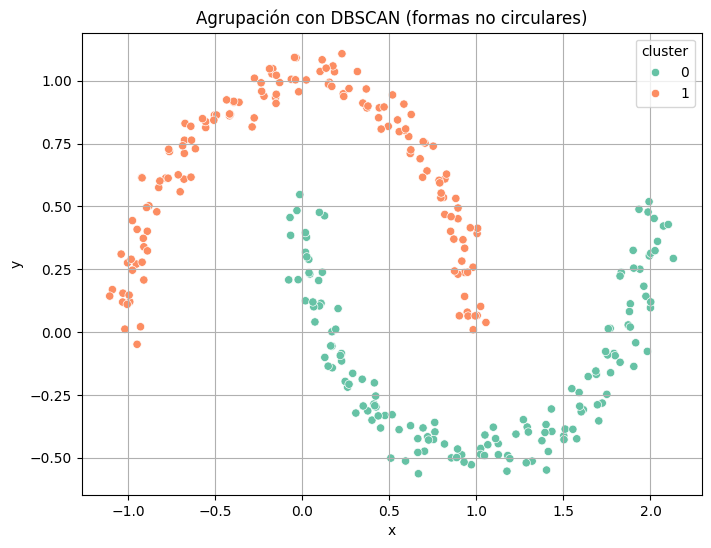

In [ ]:
# Crear datos con forma de luna
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Aplicar DBSCAN
modelo = DBSCAN(eps=0.2, min_samples=5)
etiquetas = modelo.fit_predict(X)

# Convertir a DataFrame para graficar
df = pd.DataFrame(X, columns=["x", "y"])
df["cluster"] = etiquetas

# Visualizar resultados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="x", y="y", hue="cluster", palette="Set2", legend="full")
plt.title("Agrupación con DBSCAN (formas no circulares)")
plt.grid(True)
plt.show()


## 🏗️ ¿Qué es el clustering jerárquico y cómo funciona paso a paso?

El **clustering jerárquico** es un algoritmo que construye grupos **de manera progresiva**, como si estuviera creando un **árbol de decisiones** o una **estructura familiar**.

A diferencia de K-Means o DBSCAN, **no necesitas definir el número de clusters al principio**. En su lugar, puedes explorarlos visualmente y cortar el árbol donde tenga más sentido.

---

### 🧠 Intuición paso a paso (en su versión aglomerativa)

La versión más usada es la **aglomerativa (bottom-up)**, que funciona así:

1. **Empieza con cada punto como su propio cluster**.
2. Calcula las **distancias entre todos los clusters** (al principio son solo puntos).
3. **Une los dos clusters más cercanos**.
4. Repite el proceso: recalcula las distancias y **fusiona clusters cercanos**.
5. Continúa hasta que **todos los puntos estén en un solo gran cluster** (la raíz del árbol).

🔧 Este proceso se puede visualizar con un **dendrograma**, una especie de árbol que muestra cómo se agruparon los puntos a lo largo del tiempo.

---

### 🌲 ¿Qué es un dendrograma?

Un **dendrograma** es una visualización que muestra el “árbol de agrupaciones” creado por el algoritmo.

- Las **ramas inferiores** son puntos individuales.
- A medida que subes, se van **uniendo en grupos**.
- Puedes **cortar el árbol a cierta altura** para obtener el número de clusters que desees.

---

### ⚙️ Hiperparámetros clave

| Parámetro         | ¿Qué hace? | Consecuencias |
|------------------|------------|---------------|
| `n_clusters`     | (Opcional) Número de grupos finales que deseas cortar del dendrograma. | Si no lo defines, puedes explorarlo visualmente. |
| `linkage`        | Método para calcular la distancia entre clusters. Valores comunes: `'ward'`, `'single'`, `'complete'`, `'average'`. | Afecta la forma del dendrograma y cómo se agrupan los datos. |
| `affinity`       | Tipo de distancia usada entre puntos: `'euclidean'`, `'manhattan'`, etc. | Cambia cómo se percibe la cercanía entre grupos. |

---

### 🔗 Métodos de linkage (en español)

| Método        | ¿Cómo calcula la distancia entre clusters? |
|---------------|---------------------------------------------|
| `single`      | Usa la distancia entre los **puntos más cercanos**. (puede generar cadenas largas) |
| `complete`    | Usa la distancia entre los **puntos más lejanos**. (tiende a formar grupos compactos) |
| `average`     | Promedia todas las distancias entre puntos de un grupo y del otro. |
| `ward`        | Minimiza la **varianza interna** de los grupos (solo compatible con distancia euclidiana). |

---

### ✅ ¿Cuándo usar clustering jerárquico?

- ✅ Cuando quieres **explorar la estructura de los datos** antes de decidir cuántos clusters usar.
- ✅ Cuando trabajas con pocos datos (no escala bien con datasets muy grandes).
- ✅ Cuando quieres **visualizar cómo se forman los grupos** con un dendrograma.
- ✅ Cuando tienes datos de naturaleza jerárquica o categórica.

---

### ⚠️ ¿Cuándo puede no ser ideal?

- ❌ Si tienes **miles o millones de puntos**, el cálculo de distancias y visualización del dendrograma puede volverse muy costoso.
- ❌ No detecta outliers por sí solo.
- ❌ No permite corregir una fusión una vez se ha hecho (es determinista y secuencial).

---

### 📌 Resumen

- Forma un **árbol de agrupaciones** sin necesidad de definir `K` al principio.
- Muy útil para **entender relaciones** entre datos.
- Puedes ajustar `linkage` y `affinity` para obtener diferentes tipos de agrupaciones.


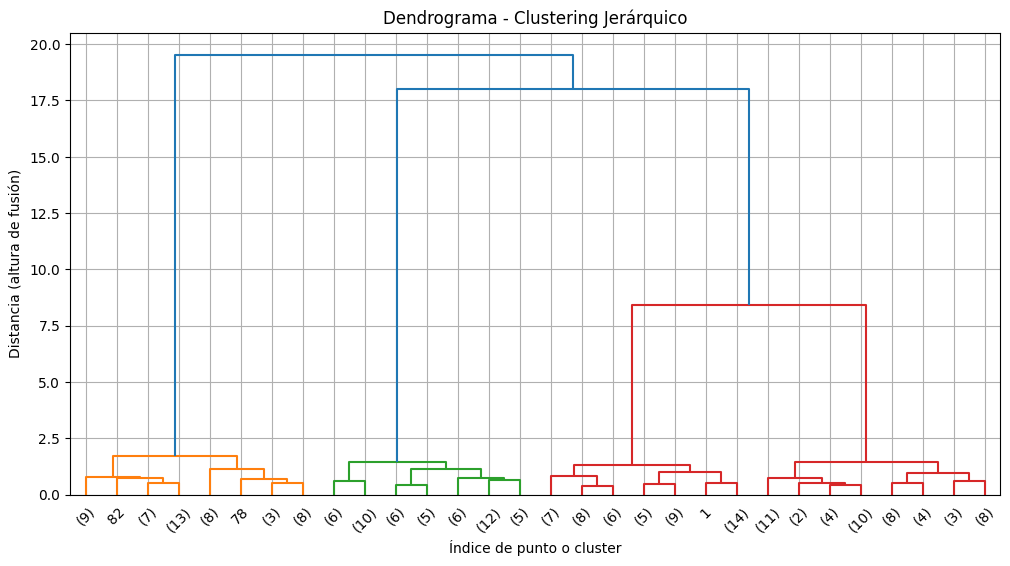

In [ ]:
# 1. Crear datos sintéticos
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)  # Normalizamos para evitar distorsiones por escala

# 2. Crear el linkage matrix (define cómo se agrupan los puntos)
# Puedes cambiar 'ward', 'single', 'complete', 'average'
linkage_matrix = linkage(X, method='ward')

# 3. Graficar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode="lastp"  , p=30, leaf_rotation=45., leaf_font_size=10.)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Índice de punto o cluster")
plt.ylabel("Distancia (altura de fusión)")
plt.grid(True)
plt.show()

## 🌳 Interpretación de un Dendrograma en Clustering Jerárquico

Un **dendrograma** es una visualización clave en el clustering jerárquico que muestra cómo los puntos (o grupos de puntos) se van **fusionando paso a paso**.

---

### 📏 Eje vertical: Distancia (altura de fusión)

- Representa la **distancia entre grupos al momento de ser unidos**.
- A menor altura, más cercanos estaban los puntos.
- Las uniones más altas indican grupos que se fusionaron cuando ya estaban bastante separados.

---

### 🧱 Eje horizontal: Puntos individuales

- Cada etiqueta en la base representa un punto o pequeño grupo de datos.
- Al inicio, cada punto comienza como su propio cluster.

---

### 🔗 ¿Qué significan las líneas?

- **Líneas horizontales**: indican una **fusión entre dos clusters**.
- **Líneas verticales**: conectan fusiones sucesivas.
- Si una línea horizontal está baja, significa que los grupos estaban **muy cerca**.
- Si está alta, significa que eran **más lejanos o diferentes**.

---

### ✂️ ¿Cómo elegir el número de clusters?

Puedes **cortar el dendrograma horizontalmente** a una cierta altura.

- Cada rama que queda **por debajo del corte** se convierte en un **cluster**.
- Un buen punto para cortar es donde se observe un “salto” grande en la altura entre uniones (como un "codo").

---

### ✅ ¿Qué aprendemos con esta herramienta?

- No necesitas definir el número de clusters desde el inicio.
- Puedes **visualizar la estructura jerárquica** de los datos.
- Permite identificar **cuántos grupos naturales** hay y qué tan distintos están entre sí.

---

### 💡 Ejemplo:

Si cortamos el dendrograma a una altura de aproximadamente `8`:

- Las ramas por debajo del corte indican que podríamos tener **4 clusters naturales**.
- Los puntos no unidos hasta alturas más grandes estaban **lejanos entre sí** y fueron los últimos en agruparse.



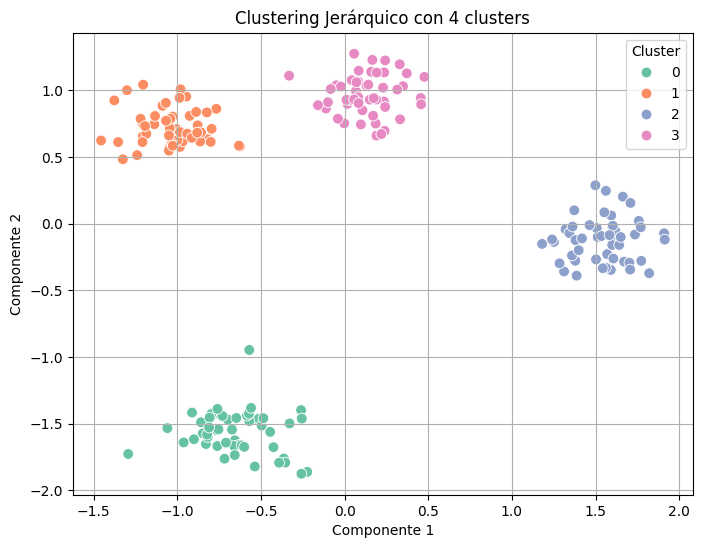

In [ ]:
# Número de clusters deseado
n_clusters = 4

modelo = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = modelo.fit_predict(X)

# 5. Visualizar agrupaciones finales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', s=60)
plt.title(f"Clustering Jerárquico con {n_clusters} clusters")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.show()

## 📊 Evaluación de Modelos de Clustering

Una vez aplicamos un algoritmo de clustering, nos enfrentamos a una gran pregunta:

### ❓ ¿Qué tan buenos son los grupos que se formaron?

A diferencia del aprendizaje supervisado, aquí **no tenemos etiquetas reales** la mayoría de veces. Por eso, usamos métricas que evalúan:

- 🧲 **Qué tan compactos** son los clusters (cohesión interna).
- 🧨 **Qué tan separados** están los clusters entre sí (separación externa).

---

## 🔹 1. Silhouette Score

### 🧠 ¿Qué mide?

Mide **cuán bien está ubicado cada punto dentro de su cluster**.  
Combina dos ideas:

- **Cohesión (a)**: ¿Qué tan cerca estoy de los puntos de mi mismo grupo?
- **Separación (b)**: ¿Qué tan lejos estoy del grupo más cercano diferente al mío?

### 📐 Fórmula

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

- `a(i)`: distancia promedio del punto `i` a todos los demás puntos de su **mismo cluster**.
- `b(i)`: distancia promedio del punto `i` al **cluster vecino más cercano**.

### 🎯 Interpretación

| Valor de Silhouette | Interpretación                  |
|---------------------|----------------------------------|
| Cercano a `+1`      | Muy bien agrupado               |
| Cerca de `0`        | En el borde entre dos clusters  |
| Cercano a `-1`      | Mal asignado a su cluster       |

Ideal para saber **qué valor de `k` (número de clusters)** produce una mejor separación natural.

---

## 🔹 2. Davies-Bouldin Index

### 🧠 ¿Qué mide?

Mide la **similitud promedio entre cada par de clusters**.

- Evalúa la **dispersión dentro del cluster** y **la distancia a otros clusters**.
- Cuanto **más pequeño** sea el índice, **mejor** es el clustering.

### 📐 Fórmula (intuitiva)

$$
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

- `s_i`: dispersión (compactación) del cluster `i`.
- `d_ij`: distancia entre los centroides de `i` y `j`.

### 🎯 Interpretación

| Valor de DB Index | Interpretación         |
|-------------------|-------------------------|
| Bajo (≈ 0)        | Grupos compactos y bien separados ✅ |
| Alto              | Clusters solapados o mal definidos ❌ |

---

## 🔹 3. Calinski-Harabasz Index

### 🧠 ¿Qué mide?

También llamado **"Variance Ratio Criterion"**.  
Mide la proporción entre:

- **Dispersión entre clusters** (qué tan separados están).
- **Dispersión dentro de cada cluster** (qué tan compactos son).

### 📐 Fórmula simplificada

$$
CH = \frac{\text{Varianza entre clusters}}{\text{Varianza dentro de clusters}} \cdot \frac{n - k}{k - 1}
$$

- `n`: número total de puntos.
- `k`: número de clusters.

### 🎯 Interpretación

| Valor de CH Index | Interpretación                |
|-------------------|-------------------------------|
| Alto              | Clusters bien definidos ✅     |
| Bajo              | Clusters difusos o mezclados ❌ |

Ideal cuando quieres evaluar qué cantidad de clusters **optimiza la varianza entre grupos**.

---

## 🔹 4. (Extra) ARI y NMI — si tienes etiquetas reales

En algunos casos especiales (como datos simulados o ejercicios de práctica), **sí tienes etiquetas reales**. En ese caso puedes comparar el agrupamiento del modelo con la "verdad":

- **ARI (Adjusted Rand Index)**: mide cuán similares son dos agrupamientos. Corrige por azar.
- **NMI (Normalized Mutual Information)**: mide cuánta información comparten los grupos reales y los predichos.

Ambas métricas tienen valores entre 0 y 1.  
👉 Más cerca de `1` significa **mayor coincidencia con las etiquetas verdaderas**.

---

## 🧮 Resumen comparativo

| Métrica                 | ¿Requiere etiquetas reales? | Ideal | ¿Qué mide?                                |
|-------------------------|-----------------------------|-------|--------------------------------------------|
| Silhouette Score        | ❌ No                        | Alto  | Cohesión y separación                      |
| Davies-Bouldin Index    | ❌ No                        | Bajo  | Similitud entre clusters                   |
| Calinski-Harabasz Index | ❌ No                        | Alto  | Varianza entre vs. dentro de clusters      |
| Adjusted Rand Index     | ✅ Sí                        | Alto  | Coincidencia con etiquetas verdaderas      |
| Normalized MI           | ✅ Sí                        | Alto  | Información compartida entre agrupaciones  |


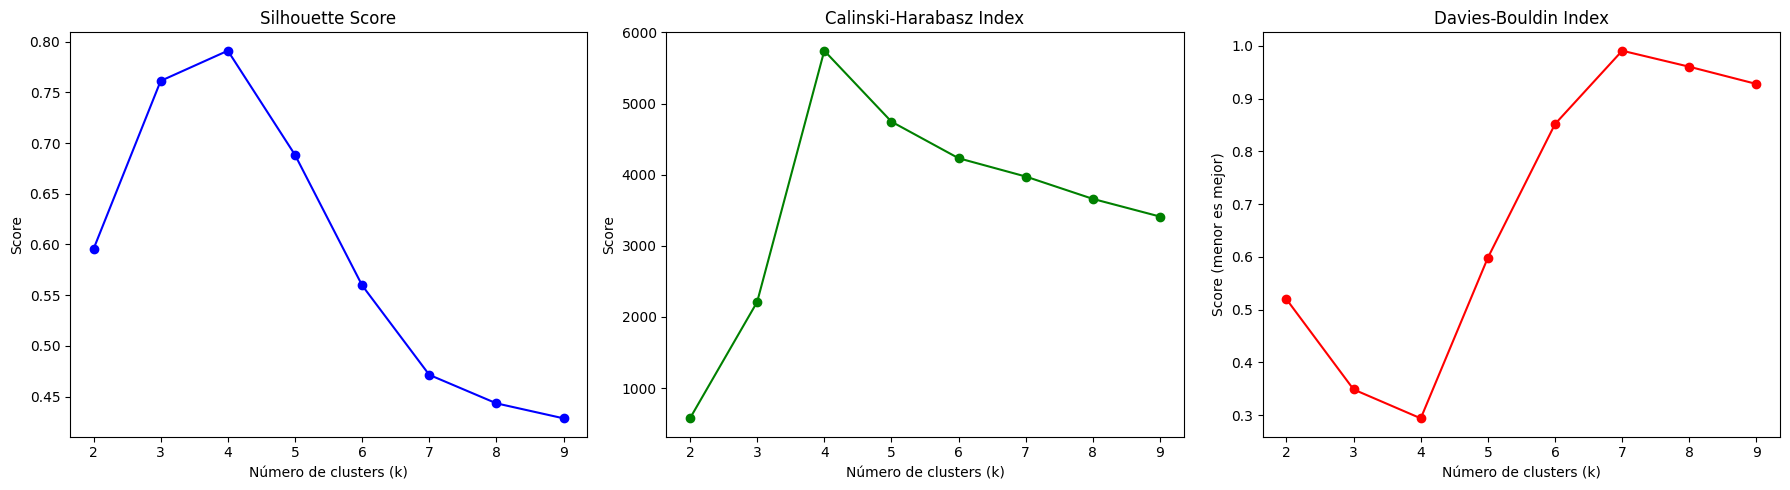

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Datos sintéticos
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Probar diferentes valores de k
k_values = range(2, 10)
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)

    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))
    davies_scores.append(davies_bouldin_score(X, labels))

# Graficar las métricas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(k_values, silhouette_scores, marker='o', color='blue')
axs[0].set_title("Silhouette Score")
axs[0].set_xlabel("Número de clusters (k)")
axs[0].set_ylabel("Score")

axs[1].plot(k_values, calinski_scores, marker='o', color='green')
axs[1].set_title("Calinski-Harabasz Index")
axs[1].set_xlabel("Número de clusters (k)")
axs[1].set_ylabel("Score")

axs[2].plot(k_values, davies_scores, marker='o', color='red')
axs[2].set_title("Davies-Bouldin Index")
axs[2].set_xlabel("Número de clusters (k)")
axs[2].set_ylabel("Score (menor es mejor)")

plt.tight_layout()
plt.show()



/tmp/ipython-input-44-894046163.py:37: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


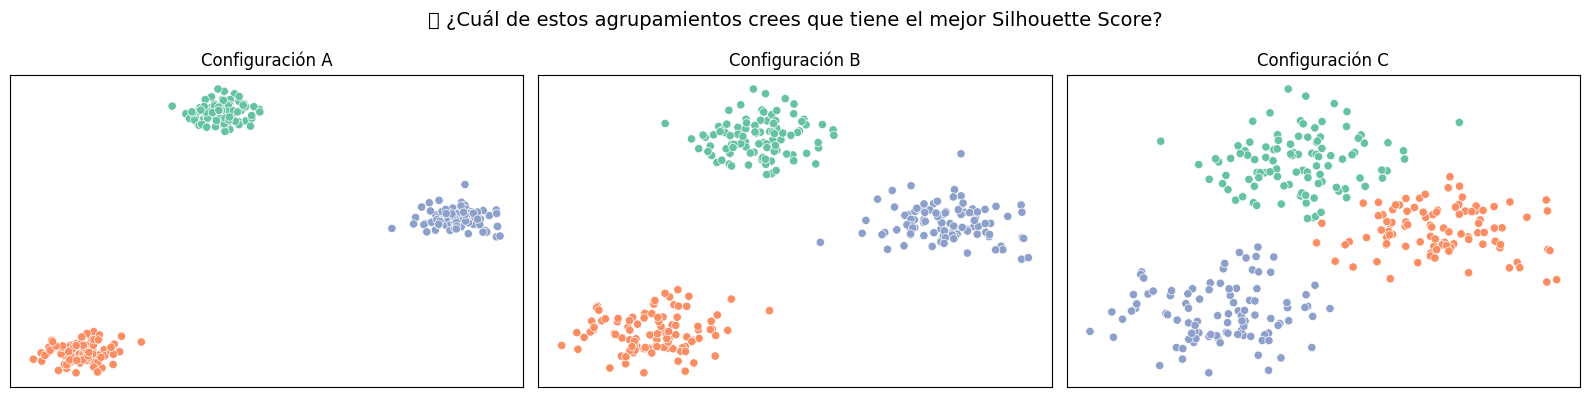

RadioButtons(description='Tu elección:', options=('A', 'B', 'C'), value='A')

Button(description='Mostrar respuesta', style=ButtonStyle())

Output()

In [ ]:
# Función para crear datasets con diferentes niveles de calidad de clustering
def generar_datasets():
    # Bueno: clusters separados y compactos
    X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

    # Medio: clusters cercanos, algo solapados
    X2, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.5, random_state=42)

    # Malo: clusters muy solapados
    X3, _ = make_blobs(n_samples=300, centers=3, cluster_std=3.0, random_state=42)

    return [X1, X2, X3]

datasets = generar_datasets()
titles = ['A', 'B', 'C']
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, (X, ax) in enumerate(zip(datasets, axs)):
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', ax=ax, legend=False)
    ax.set_title(f'Configuración {titles[i]}')
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("🔍 ¿Cuál de estos agrupamientos crees que tiene el mejor Silhouette Score?", fontsize=14)
plt.tight_layout()
plt.show()

# Widget de selección
opciones = widgets.RadioButtons(
    options=['A', 'B', 'C'],
    description='Tu elección:',
    disabled=False
)

boton = widgets.Button(description="Mostrar respuesta")

salida = widgets.Output()

def al_hacer_click(b):
    with salida:
        clear_output()
        print(f"🔍 Tu elección fue: {opciones.value}")

        # Calcular métricas reales
        for i, X in enumerate(datasets):
            kmeans = KMeans(n_clusters=3, random_state=42)
            labels = kmeans.fit_predict(X)
            sil = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)
            print(f"\n📊 Configuración {titles[i]}:")
            print(f"   - Silhouette Score: {sil:.3f}")
            print(f"   - Calinski-Harabasz: {ch:.2f}")
            print(f"   - Davies-Bouldin: {db:.2f}")

        # Mostrar cuál era el mejor
        scores = [silhouette_score(X, KMeans(n_clusters=3, random_state=42).fit_predict(X)) for X in datasets]
        mejor_idx = np.argmax(scores)
        print(f"\n✅ La mejor agrupación según Silhouette Score fue: Configuración {titles[mejor_idx]}")

boton.on_click(al_hacer_click)

display(opciones, boton, salida)


/tmp/ipython-input-45-1401715071.py:34: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


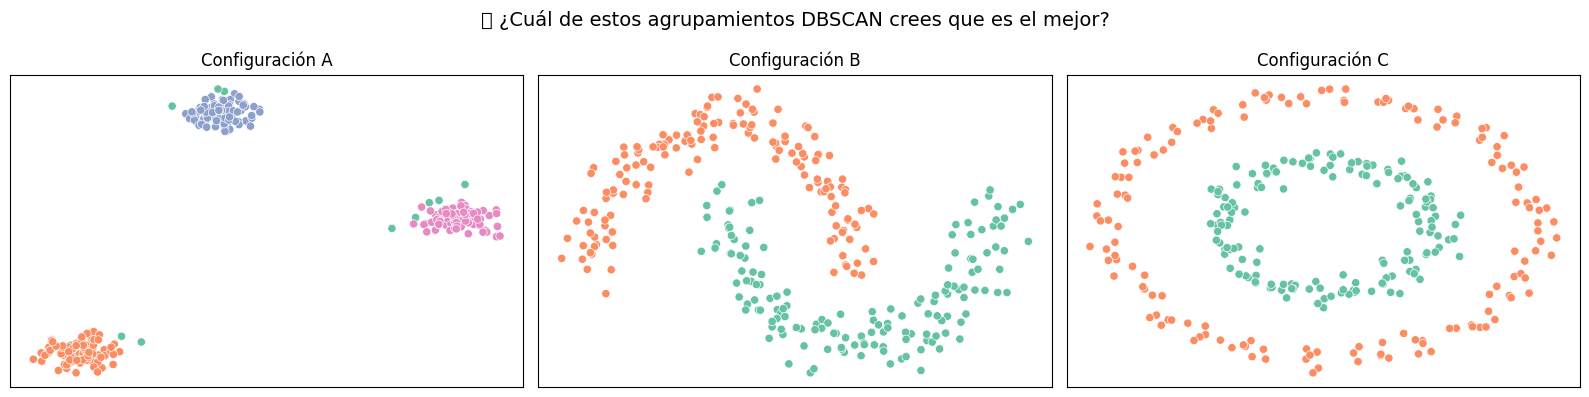

RadioButtons(description='Tu elección:', options=('A', 'B', 'C'), value='A')

Button(description='Mostrar respuesta', style=ButtonStyle())

Output()

In [ ]:

# 1. Generar datasets con diferentes complejidades y formas
X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)        # Bien separado
X2, _ = make_moons(n_samples=300, noise=0.1, random_state=42)                         # Forma curva
X3, _ = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)          # Concéntrico

datasets = [X1, X2, X3]
titles = ['A', 'B', 'C']
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# 2. Aplicar DBSCAN a cada dataset
dbscan_configs = [(0.5, 5), (0.2, 5), (0.2, 5)]
labels_all = []

for i, (X, (eps, min_samples)) in enumerate(zip(datasets, dbscan_configs)):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    labels_all.append(labels)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set2', ax=axs[i], legend=False)
    axs[i].set_title(f'Configuración {titles[i]}')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.suptitle("🔍 ¿Cuál de estos agrupamientos DBSCAN crees que es el mejor?", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Juego interactivo

# Widget de selección
opciones = widgets.RadioButtons(
    options=['A', 'B', 'C'],
    description='Tu elección:',
    disabled=False
)

boton = widgets.Button(description="Mostrar respuesta")
salida = widgets.Output()

def al_hacer_click(b):
    with salida:
        clear_output()
        print(f"🔍 Tu elección fue: {opciones.value}")

        # 4. Calcular métricas reales para cada agrupamiento
        for i, (X, labels) in enumerate(zip(datasets, labels_all)):
            # Filtrar ruido (-1) para métricas
            mask = labels != -1
            if np.sum(mask) < 2 or len(set(labels[mask])) < 2:
                print(f"\n📊 Configuración {titles[i]}:")
                print("   ⚠️ No se puede calcular métricas: pocos puntos/no hay clusters válidos.")
                continue
            sil = silhouette_score(X[mask], labels[mask])
            ch = calinski_harabasz_score(X[mask], labels[mask])
            db = davies_bouldin_score(X[mask], labels[mask])
            print(f"\n📊 Configuración {titles[i]}:")
            print(f"   - Silhouette Score: {sil:.3f}")
            print(f"   - Calinski-Harabasz: {ch:.2f}")
            print(f"   - Davies-Bouldin: {db:.2f}")

        # 5. Mostrar cuál fue la mejor
        scores = []
        for X, labels in zip(datasets, labels_all):
            mask = labels != -1
            if np.sum(mask) < 2 or len(set(labels[mask])) < 2:
                scores.append(-1)
            else:
                score = silhouette_score(X[mask], labels[mask])
                scores.append(score)
        mejor_idx = np.argmax(scores)
        print(f"\n✅ La mejor agrupación según Silhouette Score fue: Configuración {titles[mejor_idx]}")

boton.on_click(al_hacer_click)

display(opciones, boton, salida)
